In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot 
from scipy import interp
import scipy.stats
import warnings
from collections import OrderedDict 
warnings.simplefilter("ignore")
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')


In [2]:
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed2.tsv",sep="\t")
df.head()

,season,baker,week,tech_mean,tech,starbaker_mean,starbaker,judge_fav_mean,judge_fav,judge_unfav_mean,judge_unfav,place,deepbake_tier,week_eliminated,deepbake_prediction,winner_prob,finalist_prob,third_fourth_prob,fifth_seventh_prob,eighth_below_prob
0,10,Alice,1,5.00,5,0.00,0,0.00,0,0.00,0,2,1,10,1,11.20,29.70,15.49,28.09,26.72
1,10,Alice,2,3.00,1,0.50,1,0.50,1,0.00,0,2,1,10,1,33.97,85.52,2.06,9.98,2.44
2,10,Alice,3,4.33,7,0.33,0,0.33,0,0.33,1,2,1,10,3,14.17,29.37,20.81,32.60,17.23
3,10,Alice,4,5.25,8,0.25,0,0.25,0,0.25,0,2,1,10,1,17.38,41.18,24.21,31.49,3.13
4,10,Alice,5,5.40,6,0.20,0,0.20,0,0.20,0,2,1,10,1,6.58,45.57,19.00,33.14,2.30


In [3]:
def plot_gbbo_probs(df,prob,ax,colr,lab,place):
    sns.set_style("white")
    shp = ['o','s','^']
    for i,baker in enumerate(colr):    
    
        tmp = df.loc[df['baker']==baker]
        alpha,lwd=0.3,0,
        if baker in place[prob]: alpha,lwd=1.0,2
        ax.scatter(
            x=tmp['week'],
            y=tmp[prob],
            color=colr[baker],
            s=250,
            zorder=5,
            label=baker,
            linewidth=lwd,
            edgecolor='#1c1c1c',
            alpha=alpha,
            marker=shp[i%3],
        )
        
        ax.plot(
            tmp['week'],
            tmp[prob],
            color=colr[baker],
            linewidth=5,
            zorder=4,
            label='',
            alpha=alpha
        )
        if alpha==1:
            ax.plot(
                tmp['week'],
                tmp[prob],
                color='#1c1c1c',
                linewidth=11,
                zorder=1,
                label='',
            )

        
    buff=0.5
    ax.legend()
    vapeplot.despine(ax)
    ax.set_ylabel(lab)
    ax.set_xlabel("Week")
    ax.set_xticks(list(range(1,max(df['week'])+1)))
    ax.set_xlim(0,max(df['week'])+buff)
    ax.yaxis.grid()
    ax.xaxis.grid()


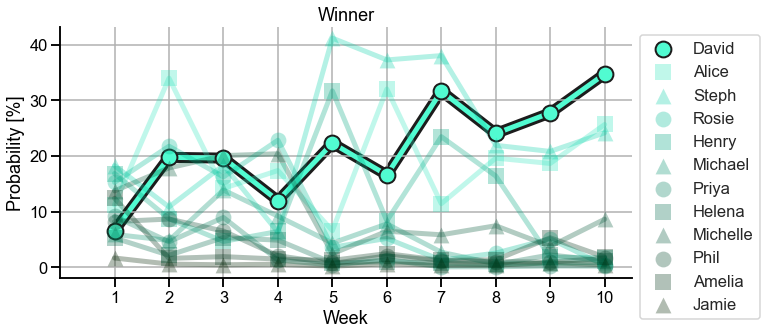

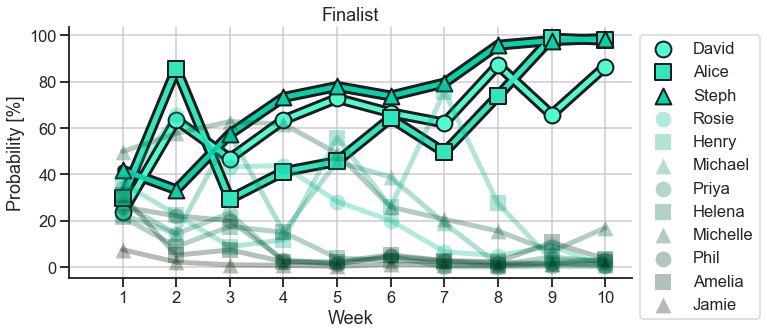

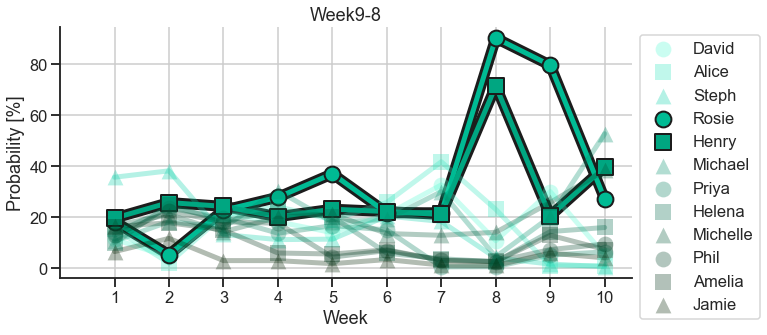

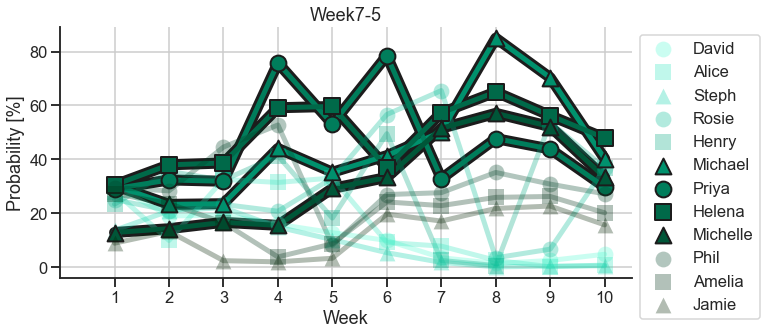

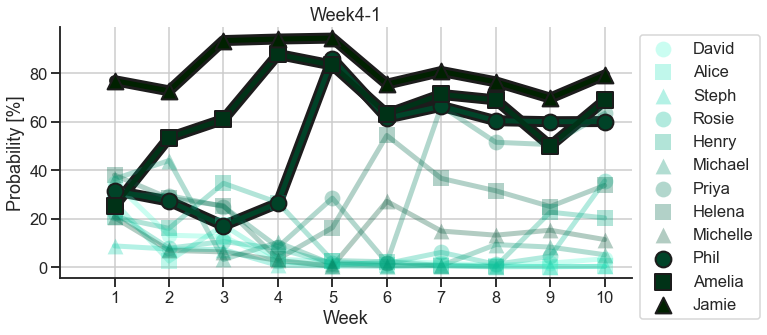

In [4]:
col=['#002100', '#003217', '#004328', '#005638', '#006949', '#007d5b', '#00916d', '#00a681', '#00bb94', '#07d1a9', '#31e6bd', '#51fbd1']
#['#4e2400', '#6f4114', '#935f29', '#b88044', '#dea164', '#fbc794', '#69e6cc', '#23c5a3', '#0da181', '#007e61', '#005c42', '#003c26']        
colrs=list(reversed(col))
gbbo=df
place = {
    'winner_prob' : ['David'],
    'finalist_prob' : ['David','Alice','Steph'],
    'third_fourth_prob' : ['Rosie','Henry'],
    'fifth_seventh_prob' : ['Michael','Priya','Helena','Michelle'],
    'eighth_below_prob' : ['Phil','Amelia','Jamie','Dan']
}

TITL = ['Winner','Finalist','Week9-8','Week7-5','Week4-1']

gbbo = gbbo.sort_values(ascending=True,by=['week','place'])
tmp = gbbo.loc[gbbo['week']==max(gbbo['week'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

for i,k in enumerate(place):
    sns.set_context("talk")
    f,ax = plt.subplots(1,1,figsize=(11,5))
    plot_gbbo_probs(gbbo,k,ax,colr_dict,'Probability [%]',place)
    ax.set_title(TITL[i])
    ax.legend(bbox_to_anchor=(1., 1.))
    f.tight_layout()
    f.savefig("../fig/s10_{}.png".format(k),dpi=300)